In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,mean_squared_error ,r2_score
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns

In [2]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            y_pred = self.predict(X)
            error = y_pred - y
            gradient = np.dot(X.T, error) / len(X)
            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * np.mean(error)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [3]:
df=pd.read_csv('HouseListingsTop45Cities.csv',encoding='ISO-8859-1')
df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [4]:
df.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [5]:
df.shape

(35768, 10)

In [6]:
df.columns

Index(['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income'],
      dtype='object')

In [7]:
df.dtypes

City                     object
Price                   float64
Address                  object
Number_Beds               int64
Number_Baths              int64
Province                 object
Population                int64
Latitude                float64
Longitude               float64
Median_Family_Income    float64
dtype: object

In [8]:
df.isnull()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
35763,False,False,False,False,False,False,False,False,False,False
35764,False,False,False,False,False,False,False,False,False,False
35765,False,False,False,False,False,False,False,False,False,False
35766,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

<Figure size 1500x800 with 0 Axes>

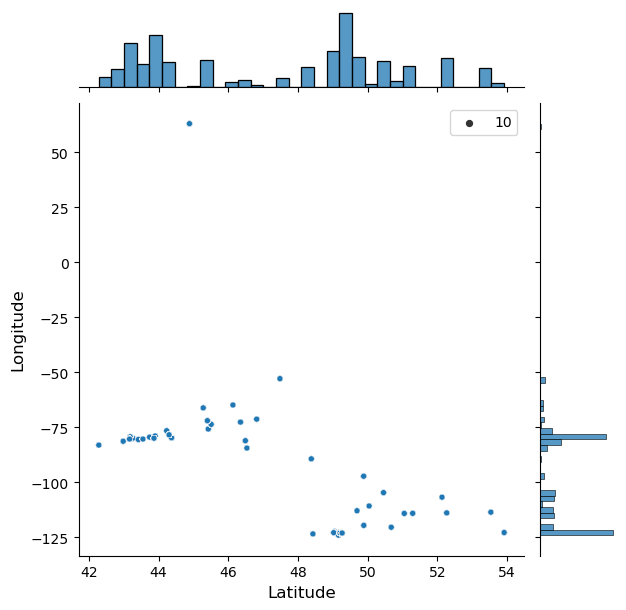

In [10]:
plt.figure(figsize=(15,8))
sns.jointplot(x=df.Latitude.values, y=df.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

In [12]:
df['City']=le.fit_transform(df['City'])
df['Province']=le.fit_transform(df['Province'])

In [13]:
df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,38,779900.0,#318 -20 SOUTHPORT ST,3,2,6,5647656,43.7417,-79.3733,97000.0
1,38,799999.0,#818 -60 SOUTHPORT ST,3,1,6,5647656,43.7417,-79.3733,97000.0
2,38,799900.0,#714 -859 THE QUEENSWAY,2,2,6,5647656,43.7417,-79.3733,97000.0
3,38,1200000.0,275 MORTIMER AVE,4,2,6,5647656,43.7417,-79.3733,97000.0
4,38,668800.0,#420 -388 RICHMOND ST,1,1,6,5647656,43.7417,-79.3733,97000.0


In [14]:
df.drop(['Address'], axis=1 , inplace=True)

In [15]:
df.head()

,City,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,38,779900.0,3,2,6,5647656,43.7417,-79.3733,97000.0
1,38,799999.0,3,1,6,5647656,43.7417,-79.3733,97000.0
2,38,799900.0,2,2,6,5647656,43.7417,-79.3733,97000.0
3,38,1200000.0,4,2,6,5647656,43.7417,-79.3733,97000.0
4,38,668800.0,1,1,6,5647656,43.7417,-79.3733,97000.0


In [16]:
X,y=df.drop(['Price'],axis=1),df.Price
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape,y_test.shape

((28614, 8), (7154,))

In [18]:
train_df=X_train.join(y_train)

In [19]:
train_df

,City,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income,Price
4351,7,4,2,0,1151635,53.5344,-113.4903,96000.0,550000.0
18967,12,4,3,1,181380,49.8881,-119.4956,85000.0,1300000.0
24897,21,3,2,1,106079,49.1642,-123.9364,77500.0,1525000.0
5916,24,3,3,6,1068821,45.4247,-75.6950,98000.0,869900.0
10822,34,5,2,6,242460,43.1833,-79.2333,77000.0,659900.0
...,...,...,...,...,...,...,...,...,...
16850,29,3,3,8,226404,50.4547,-104.6067,90000.0,924900.0
6265,24,2,2,6,1068821,45.4247,-75.6950,98000.0,599000.0
11284,34,3,2,6,242460,43.1833,-79.2333,77000.0,639888.0
860,38,2,1,6,5647656,43.7417,-79.3733,97000.0,829000.0


array([[<Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Number_Beds'}>,
        <Axes: title={'center': 'Number_Baths'}>],
       [<Axes: title={'center': 'Province'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Median_Family_Income'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

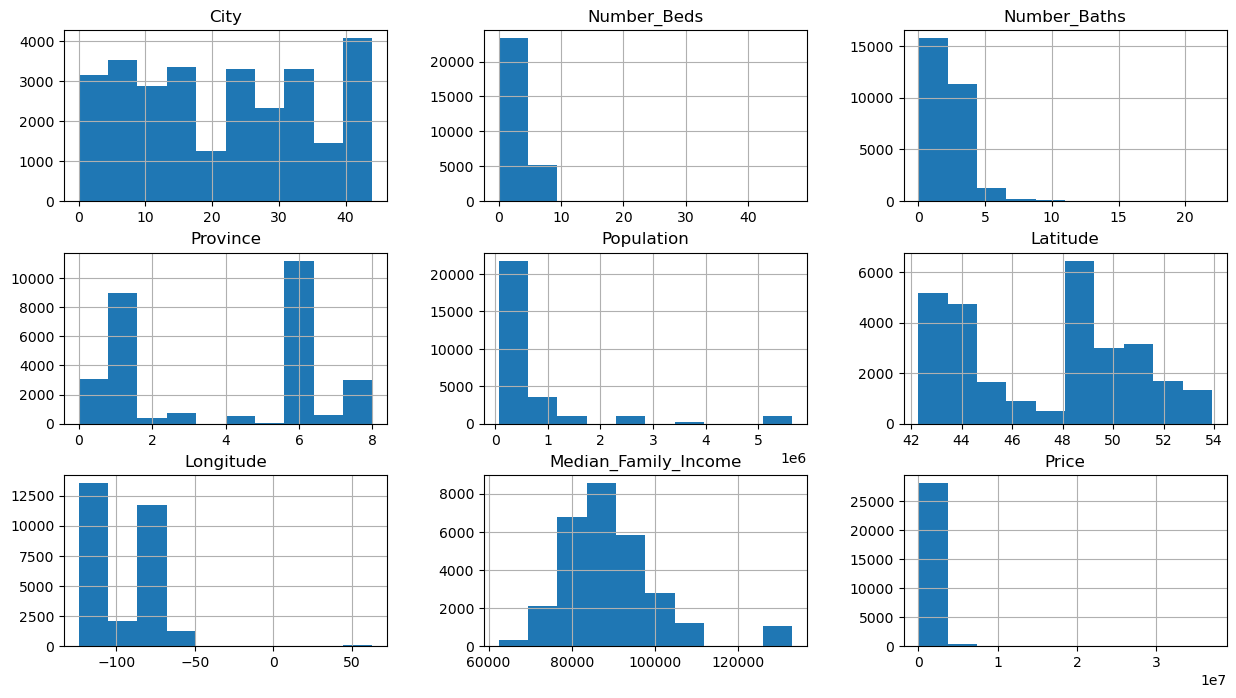

In [20]:
train_df.hist(figsize=(15,8))

In [21]:
train_df.corr()

,City,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income,Price
City,1.000000,-0.058187,-0.080579,0.148274,0.255236,0.023143,-0.005775,-0.412951,0.023654
Number_Beds,-0.058187,1.000000,0.717191,0.066681,-0.099467,-0.070237,0.054557,0.061133,0.328007
Number_Baths,-0.080579,0.717191,1.000000,-0.025024,-0.081804,-0.022906,-0.034289,0.122124,0.469064
Province,0.148274,0.066681,-0.025024,1.000000,0.047011,-0.539196,0.663858,0.096306,-0.149810
Population,0.255236,-0.099467,-0.081804,0.047011,1.000000,-0.122516,0.102270,0.137648,0.074773
Latitude,0.023143,-0.070237,-0.022906,-0.539196,-0.122516,1.000000,-0.728936,-0.068287,-0.065212
Longitude,-0.005775,0.054557,-0.034289,0.663858,0.102270,-0.728936,1.000000,0.072814,-0.140330
Median_Family_Income,-0.412951,0.061133,0.122124,0.096306,0.137648,-0.068287,0.072814,1.000000,0.060429
Price,0.023654,0.328007,0.469064,-0.149810,0.074773,-0.065212,-0.140330,0.060429,1.000000


<Axes: >

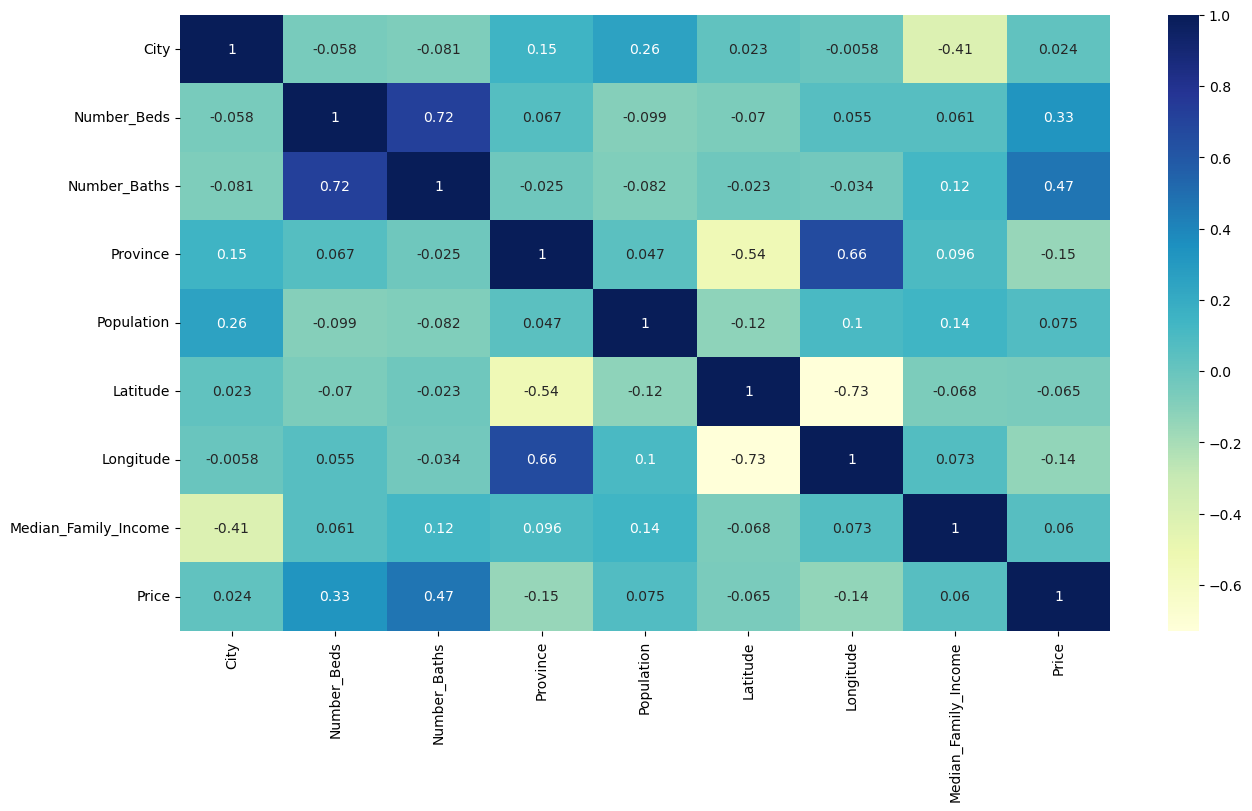

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='Latitude', ylabel='Longitude'>

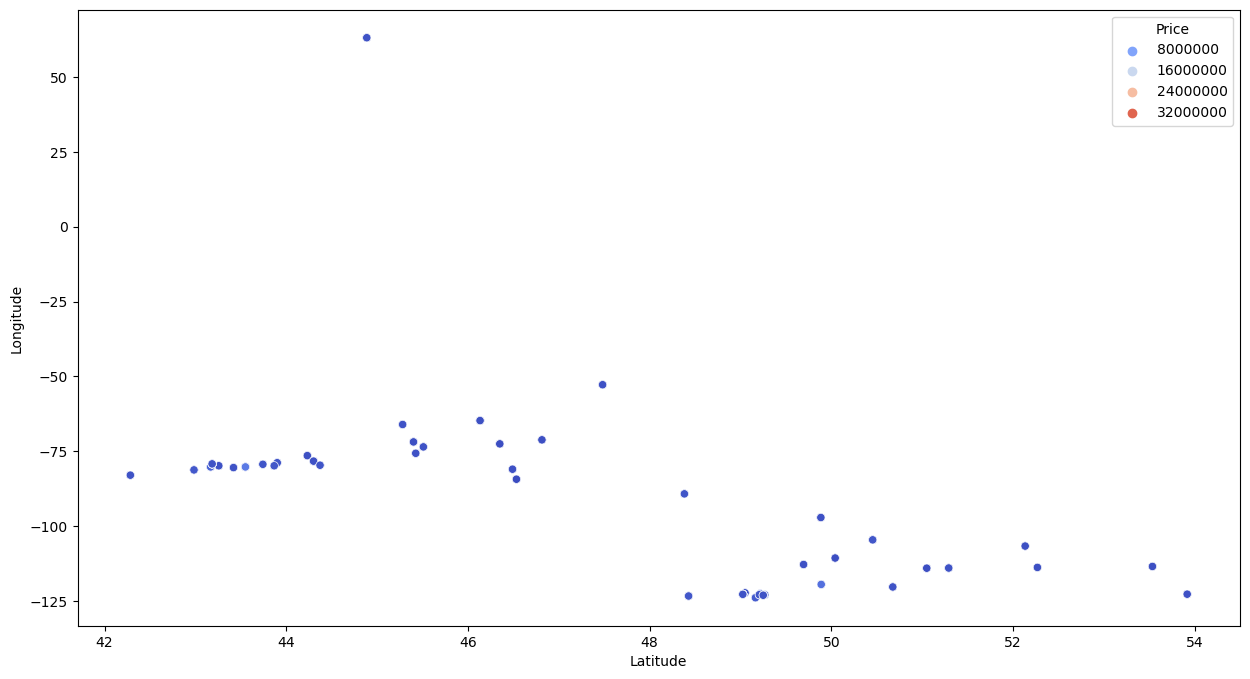

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Latitude",y="Longitude",data=train_df,hue="Price",palette="coolwarm")

In [24]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

In [26]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 850090.7384763389
Testing RMSE: 852576.065787183


In [27]:
new_data = np.array([[12,4,3,1,181380,49.8881,-119.4956,85000.0]])  
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)
print('Predicted price:', predicted_price)

Predicted price: [1175698.7051106]


C:\Users\vsrir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
